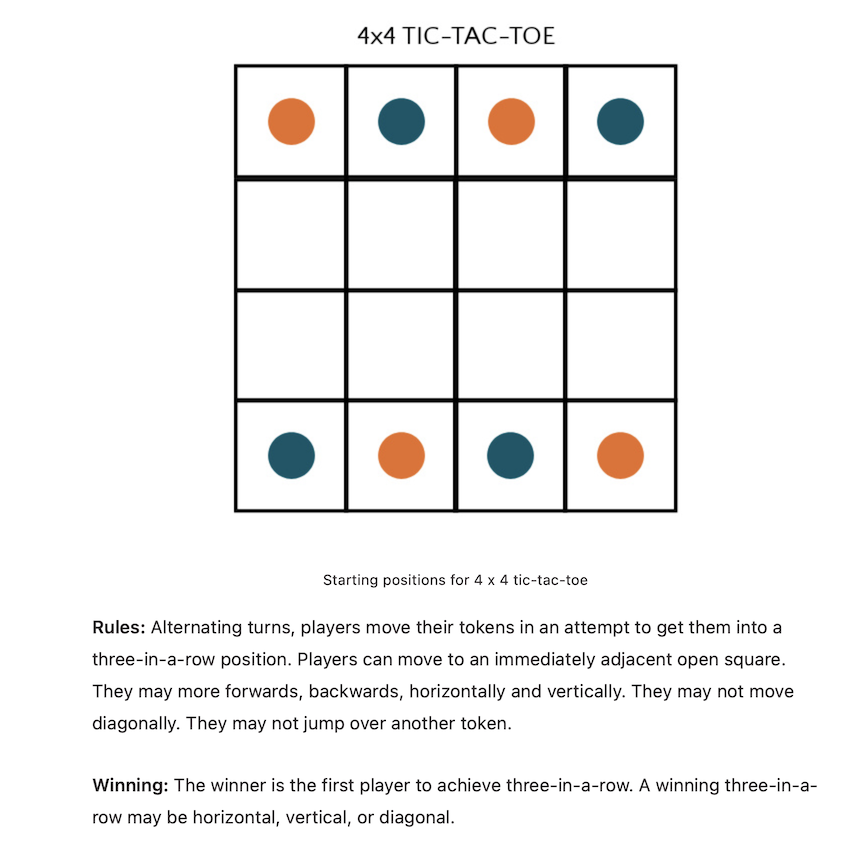

In [1]:
from Game import *
from Game.minimax import *

Version:  0.2.42


In [2]:
def initial_state():
    state=Board(4,4)

    #state[0]=state[2]=state[13]=state[15]=1

    for i in [0,2,13,15]:
        state[i]=1
        
    for i in [1,3,12,14]:
        state[i]=2

    return state

def show_state(state):
    print(state)

def valid_moves(state,player):

    moves=[]

    # single move is a start,end pair
    
    for i in range(16):
        # down
        if i not in [12,13,14,15] and state[i]==player and state[i+4]==0:
            moves.append( [i,i+4] )
        # up
        if i not in [0,1,2,3] and state[i]==player and state[i-4]==0:
            moves.append( [i,i-4] )
        # right
        if i not in [3,7,1,15] and state[i]==player and state[i+1]==0:
            moves.append( [i,i+1] )
        # left
        if i not in [0,4,8,12] and state[i]==player and state[i-1]==0:
            moves.append( [i,i-1] )


    return moves


def update_state(state,player,move):

    start,end=move

    new_state=state
    new_state[start]=0
    new_state[end]=player

    return new_state



def win_status(state,player):
    #  0  1  2  3 
    #  4  5  6  7 
    #  8  9 10 11 
    # 12 13 14 15 

    if player==1:
        other_player=2
    else:
        other_player=1

    # horizontal
    for i in [0,1,4,5,8,9,12,13]:
        if state[i]==state[i+1]==state[i+2]==player:
            return 'win'
    # vertical
    for i in [0,1,2,3,4,5,6,7]:
        if state[i]==state[i+4]==state[i+8]==player:
            return 'win'

    # diagonal-right
    for i in [0,1,4,5]:
        if state[i]==state[i+5]==state[i+10]==player:
            return 'win'
            
    # diagonal-left
    for i in [2,3,6,7]:
        if state[i]==state[i+3]==state[i+6]==player:
            return 'win'


    if not valid_moves(state,other_player):
        return 'stalemate'
    


In [3]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)

random_agent=Agent(random_move)

def human_move(state,player):
    print("Player ", player)
    state.show_locations()
    print("Your valid moves are: ",valid_moves(state,player))
    valid_move=False
    while not valid_move:
        move=eval(input('What is your move? (e.g. [2,6]'))

        if move in valid_moves(state,player):
            valid_move=True
        else:
            print("Illegal move.")

    return move
human_agent=Agent(human_move)


In [4]:
def minimax_move(state,player):

    values,moves=minimax_values(state,player,maxdepth=5)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [5]:
def skittles_move(state,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    # make/adjust the table

    if state not in S:
        # add a row to the table for each move
        S[state]=Table()
        moves=valid_moves(state,player)
        for action in moves:
            S[state][action]=3  # number of skittles/beads for each move
    
    move=weighted_choice(S[state])

    if move is None:  # there are no skittles in this row
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0

        move=random_move(state,player)

    
    return move


In [6]:
def skittles_after(status,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    if status=='lose':
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0
                
    # does this double-count the learning if you lose on your own turn        
    

In [9]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=Table()
skittles_agent1.post=skittles_after

skittles_agent2=Agent(skittles_move)
skittles_agent2.S=Table()
skittles_agent2.post=skittles_after

In [13]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title
from tqdm import tqdm

In [14]:
agent1=skittles_agent1
agent1.S=Table()
agent2=skittles_agent2
agent2.S=Table()

In [15]:
S=Storage()
one,two,ties,N=0,0,0,0

In [16]:
for i in tqdm(range(600)):
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(agent1,agent2)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N

100%|█████████████████████████████████████████████████████████████| 600/600 [08:15<00:00,  1.21it/s]


In [17]:
y1,y2,y0,x=S.arrays()

Text(0, 0.5, 'Percent')

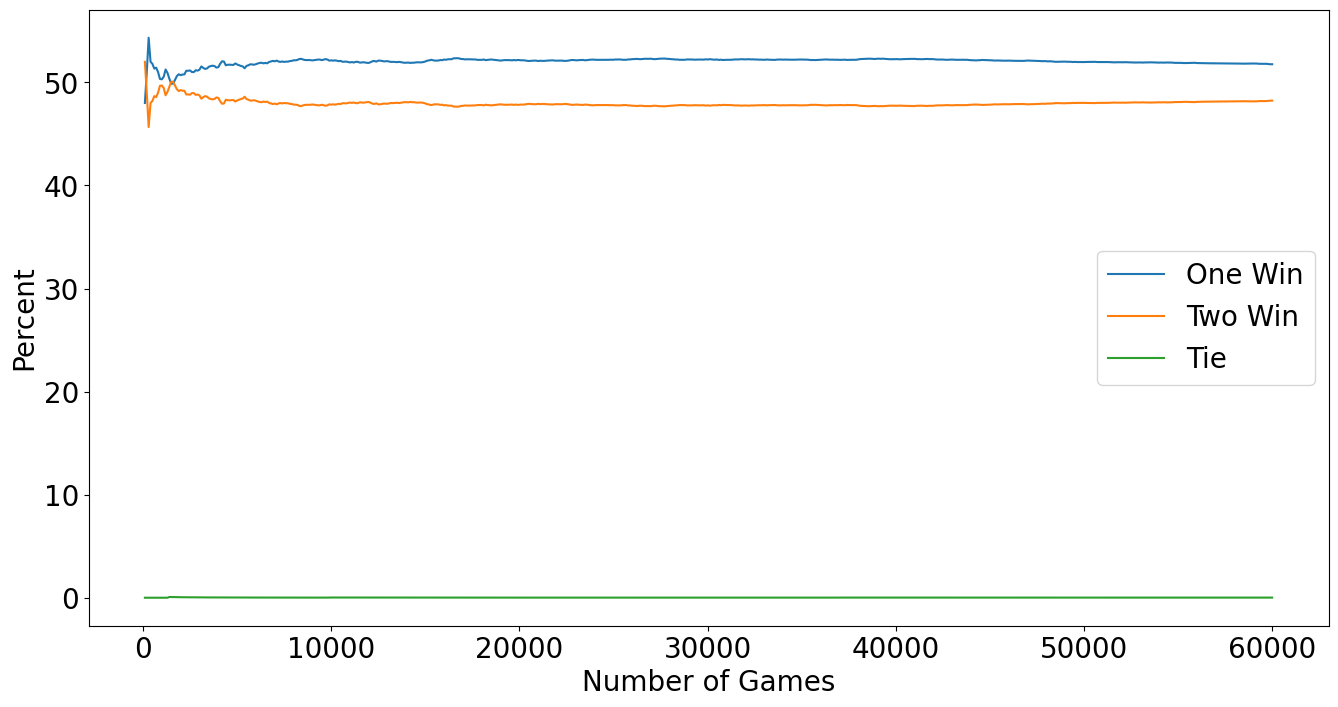

In [18]:
figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')

## Play a game or two against it to see how good it is

In [ ]:
g=Game(number_of_games=1)

result=g.run(human_agent,skittles_agent2)